<img src="./img/HWNI_logo.svg"/>

# Lab 07b - Correlation

In [1]:
# makes our plots interactive
%matplotlib notebook

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab07utils as utils

utils.formatDataframes()

## Introduction

A technical note: like Lab 06, this notebook uses the interactive features of JuPyter notebooks. This means that when you generate a plot, you can keep adding things to that plot, so long as you don't either 1) make a new figure or 2) click the blue "power button" in the top-right corner of the figure.

To prevent yourself from accidentally plotting into a figure you didn't mean to plot into, make sure to include a `plt.figure()` in each cell where you're making a plot. You'll want to do this right before you do the plotting commands (`sns.distplot`, `plt.plot`,etc.).

In class, we discussed several views of what the correlation means.

#### Q Which one is your favorite?

<font color="1874CD"> ** I think of correlation as a quantification of how good the best model is -- it's the square root of the variance explained by the linear model. We pick the positive or negative square root depending on whether the relationship is positive or negtive. **

Traditionally, the correlation is represented by the letter $r$.

Why $r$? The $r$ stands for *regression*, and we learned in class that there's a close connection between regression and correlation.

But why *regression*? Doesn't that usually mean moving backwards? 

If you're curious, check out the material below for a bit of history, otherwise you can move on to the next section.

In fact, it does mean moving backwards in statistics as well. The term goes back to the late 19th century, when statistics was being developed, primarily for the purpose of measuring human populations. Of particular interest to statisticians at this time was the science of heredity (biological evolution being one of the first non-deterministic scientific theories). 

Note also that at this time, most scientists and mathematicians were aristocratic or independently wealthy males, as only a person with a steady income from other sources could afford the luxury of experimental apparatus and uninterrupted study, and women were largely barred. The Western European upper classes of this time were enamored with the theories of scientific racism and sexism, which helped to assuage the cognitive dissonance caused by combining their liberal sentiments about all persons being created equal with the material fact that equal opportunity was denied to almost all persons in their society, and they kind of liked it that way.

Enter [Sir Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton), the half-cousin of Charles Darwin and the scion of a Quaker family who made their fortune dealing arms [(I am not making this up)](https://theironroom.wordpress.com/2015/03/23/faith-and-disunity-samuel-galton-and-the-quakers/). He was concerned to know whether the male children of tall fathers were themselves taller than average -- prejudices regarding height being then more explicit then than [they are now](http://gladwell.com/blink/why-do-we-love-tall-men/). He collected the relevant data and then invented linear modeling to summarize it. 

Sir Francis was delighted to discover that the average height of the son was correlated with the average height of the father, but horrified to see that the slope of this line was less than 1! This meant that, on average, sons would be shorter than their fathers, and their sons shorter than them, and so on. He termed this phenomenon [*regression to mediocrity*](https://books.google.com/books?id=JPcRAAAAYAAJ&pg=PA246#v=onepage&q&f=false), and the term stuck.

## Computing the Correlation

First, let's generate some correlated data.

The simplest way to generate data that is dependent is to first sample one set of random numbers, then generate another set whose values depend on the first. 

In this example, we create correlated data by first sampling an array of x values from a standard normal and then generating an array of ys by adding another set of random numbers to the xs.

<IPython.core.display.Javascript object>


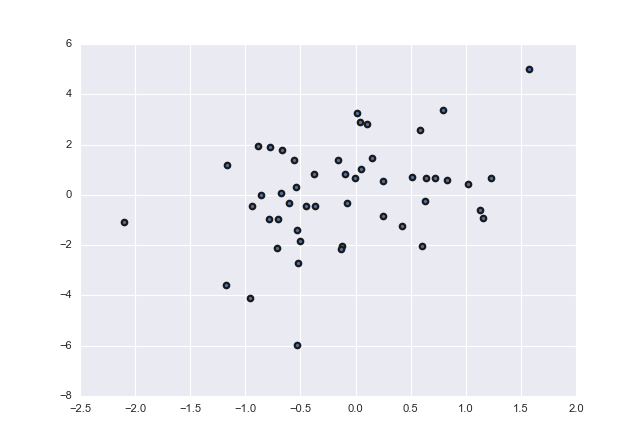

In [2]:
numPoints = 50
noise_level = 2

def generateData(numPoints,noise_level):
    xs = np.random.standard_normal(size=numPoints)
    ys = np.asarray([x+np.random.standard_normal()*noise_level
                 for x in xs])
    
    return xs,ys

xs,ys = generateData(numPoints,noise_level)

plt.figure()
plt.scatter(xs,ys,
            s=24,linewidth=2);

Python offers a number of options for computing the correlation coefficient of two or more datasets.

### With NumPy

NumPy offers the `corrcoef` function. This function returns a correlation matrix -- the `ij`th entries of this matrix tell you the correlation between the `i`th and `j`th arguments.

#### Q What do you expect the correlation coefficient to be when `i == j` (i.e. for the diagonal elements of the matrix)?

<font color="1874CD"> ** It's 1 -- a variable is perfectly correlated with itself! **

Run `corrcoef` below.

In [3]:
np.corrcoef(xs,ys)

array([[ 1.        ,  0.35802796],
       [ 0.35802796,  1.        ]])

Increase the `noise_level` above.

#### Q What happens to the  correlation coefficient?

<font color="1874CD"> ** It goes down. **

### With Pandas

Pandas offers a way to calculate the correlation matrix of the numeric columns in a data frame. Data frames have a method, `.corr` that returns the correlation matrix as a data frame.

First, we have to get our data into the pandas `DataFrame` format. Do this in the cell below using `pd.DataFrame.from_dict` or `.from_items`, then calculate the correlation matrix using `data.corr()`.

In [4]:
df = pd.DataFrame.from_items([('x',xs),('y',ys)])
df.corr()

,x,y
x,1.000000,0.358028
y,0.358028,1.000000


### With Seaborn

Seaborn's prime directive is to make things that people do frequently as painless as possible. Since plotting pairs of things and calculating their correlation is a very common step in data analysis, seaborn makes it extremely easy.

Use the function `sns.jointplot` to simultaneously make a scatter plot of the data, calculate the correlation coefficient, and get a bootstrapped $p$-value for the correlation (it's easier than it sounds!).

<IPython.core.display.Javascript object>


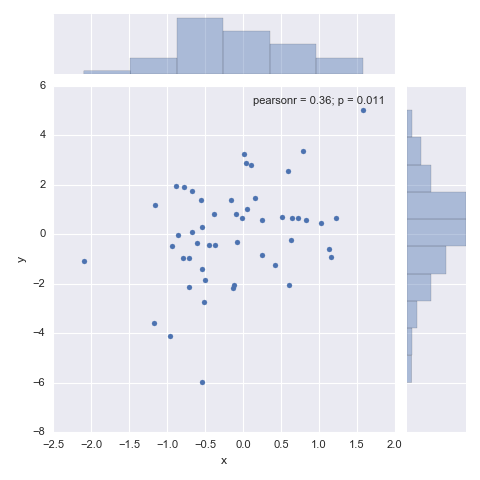

In [5]:
sns.jointplot(data=df,x='x',y='y');

### By Hand

We discussed a formula for the correlation coefficient, $r$. It is reprodcued below.

$$
r = \frac{1}{n-1} \sum_{i=1}^{n}{\frac{(x_i-\mu_x)^2}{s_x}
                                  \frac{(y_i-\mu_y)^2}{s_y}}
$$

where $s_a$ is the estimated population standard deviation of a variable $a$:

$$
s_a = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}{\left(a_i-\mu_a\right)^2}}
$$

Use this formula to define a function that will compute the correlation coefficient of any pair of random variables, then run that function on our data.

In [6]:
def correlate(xs,ys):
    assert len(xs) == len(ys), "arrays must be same size"
    zScored_xs = zScore(xs)
    zScored_ys = zScore(ys)
    return np.dot(zScored_xs,zScored_ys)/(len(xs)-1)

def zScore(xs):
    mu = np.mean(xs)
    sd = np.std(xs,ddof=1)
    zs = [(x - mu)/sd for x in xs]
    return zs

In [7]:
correlate(xs,ys)

0.35802796416310695

## Getting Confidence Intervals on Correlations with Bootstrapping

In the first half of the lab, we examined the bootstrapping procedure for estimating the sampling distribution of statistics. Now, we'll use that procedure to estimate the sampling distribution of the correlation coefficient.

In the cell below, implement the bootstrap for the correlation coefficient. That is, generate a dataset of size $N$ (aka `numPoints`). Then, draw $N$ pairs of `x` and `y` values from the dataset (with replacement) and calculate the correlation coefficient. You can use `np.random.randint(0,len(data)` to generate a random list of indices for sampling with replacement. Draw pairs from the same dataset at least 1000 times and then plot the distribution of the resulting values.

In [8]:
numPoints = 50
noise_level = 2

xs,ys = generateData(numPoints,noise_level)

data = np.asarray([xs,ys]).T #this format is more convenient for bootstrapping

def bootstrapSample(data):
    # draw N pairs of x and y values
    indices = np.random.randint(0,len(data),size=len(data))
    return data[indices]

def runBootstrap(data,numBootstraps):
    #use bootstrapSample numBootstraps times,
    # computing the correlation coefficient each time
    rs = np.zeros(numBootstraps)
    for bootstrapIdx in range(numBootstraps):
        sample = bootstrapSample(data)
        rs[bootstrapIdx] = np.corrcoef(sample.T)[0,1]
    return rs

In [9]:
numBootstraps = 1000
rs = runBootstrap(data,numBootstraps)

0.352761585722


<IPython.core.display.Javascript object>


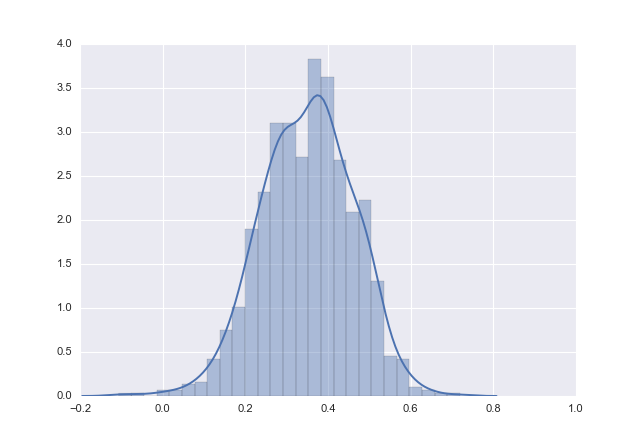

/Users/charlesfrye/anaconda/envs/neur299/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [10]:
print(correlate(xs,ys))

plt.figure()
sns.distplot(rs);

Given (an approximation to) the sampling distribution, we can calculate a confidence interval at confidence level $\alpha$ by dropping the extreme values of the sampling distribution -- the lower bound of the confidence interval is the $\alpha/2$th percentile of the sampled values and the upper bound of the confidence interval is the $1-\alpha/2$th percentile.

Compute the confidence interval for your correlation coefficient in the cell below. Use, as we do out of habit, $\alpha=0.05$. Hint: look up `np.percentile`. Notice that it takes percentiles as values between 0 and 100, not between 0 and 1!

In [11]:
r = correlate(xs,ys)

def computeCI(rs,alpha=.05):
    CI = [np.percentile(rs,100*alpha/2),
          np.percentile(rs,100*(1-alpha/2))]
    return CI

print(r)
computeCI(rs)

0.352761585722


[0.13014060743176728, 0.54704662796549375]

If we can compute a confidence interval, we can compute a p-value.

#### Q Briefly, how would you check if a result is significant at a level $\alpha$ using the set of sampled $r$s?

<font color="1874CD"> ** Check if the null hypothesis is included in the $1-\alpha$ confidence interval. **

## Cautionary Tales

In addition to not implying causation, correlation is also frequently misinterpreted in the following way: uncorrelated variables have no dependence on each other. This is untrue, as indicated in the Kendrick Kay lecture and in class.

#### Q What can we actually say about the (lack of a) relationship between two uncorrelated variables?

<font color="1874CD"> ** There is no *linear* relationship. **

Below, let's play with some data that is poorly described by its correlation.

The easiest way to generate this data is to generate random values for $x$ and then generate each $y$ by applying some function to each $x$ and adding some scaled normal noise to the output (here, using the variable `noise_level`).

Here are some ideas for functions to try:

- `np.power`
- `np.sin`, `.cos`, `.tan`, or other trigonometric functions
- `min`, `max`
- a function that draws a random number, like `np.random.choice` or `np.random.randint`

Do this for at least two different functions. Write some notes below and be ready to share what you found with the class. Compute the correlation coefficient and plot the data using the cell below. The line drawn on the figure is the linear model presumed by the correlation coefficient. Keep the number of points high (over 100) so that the sample-to-sample variation is small.

**Optional challenge for folks looking to take their Python to the next level**

It's fairly straightforward to implement the procedure described above using list comprehensions (stuff like `[f(x) for x in xs]`). You can make your code even cleaner and easier to use by defining `f` as a variable, like `f = np.square`, above the list comprehension. However, that only works with functions that take in just one argument. If you'd like to both make your code cleaner and expand the kinds of functions you can use, read up on [lambda functions](http://stackoverflow.com/questions/890128/why-are-python-lambdas-useful) and use them below.

In [12]:
numPoints = 500
noise_level = 1
x_spread = 3

## Kendrick's example
f = lambda x: np.power(x,2)

#f = lambda x: np.arctan(x)

#f = lambda x: max(x,0)

## neural firing as a function of overlap w receptive field?
#f = lambda x: max(x,0)+max(np.random.standard_normal()*0.5+1,0)

## h/t to Bruno Olshausen
#f = lambda x: np.random.choice([-1,1])*x

## mixture-of-gaussians
#f = lambda x: np.random.randint(-1,4)*x

## product-of-gaussians
f = lambda x: np.random.standard_normal()*x

xs = np.random.standard_normal(numPoints)*x_spread
ys = [f(x)+np.random.standard_normal()*noise_level for x in xs]

df = pd.DataFrame.from_dict({'x':xs,'y':ys})

In [13]:
correlate(xs,ys)

-0.13306967424240562

<IPython.core.display.Javascript object>


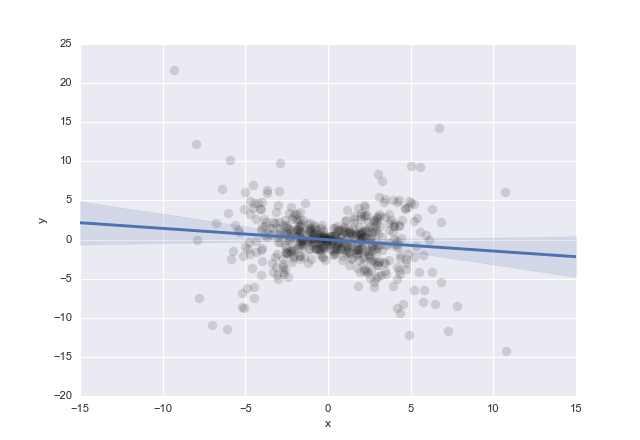

In [14]:
plt.figure()

scatter_kws = {'alpha':0.15,
                'color':'k',
                 's':72}

sns.regplot(data=df,x='x',y='y',
            scatter_kws=scatter_kws);